# VRSTE SKALIRANJA

Skaliranje koristimo u situacijama u kojima su rasponi vrijednosti značajki u različitim skalama mjerenja. Kada ne bismo koristili skaliranje vrijednosti čije bi mjere u većim mjernim skalama imale više utjecala na naša predviđanja.

### Min Max Scaler

Za svaku vrijednost neke značajke, MinMax Scaler oduzima minimalnu vrijednost značajke te dobivenu vrijednost dijeli rasponom vrijednosti značajke.

MinMax Scaler zadržava oblik orginalne distribucije i ne umanjuje utjecaj outliera. Default vrijednosti koje vraća MinMax Scaler su u rasponu od 0 do 1.

Koristi se ako su nam vrijednosti gornje i donje granice poznate iz domenskog znanja. Skaliranje podatke sažima u uži skup.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import pandas as pd

# use the iris dataset
X, y = load_iris(return_X_y=True)
print(X.shape)
# (150, 4) # 150 samples (rows) with 4 features/variables (columns)
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True

(150, 4)
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e67a6a6d0>,
      dtype=object)

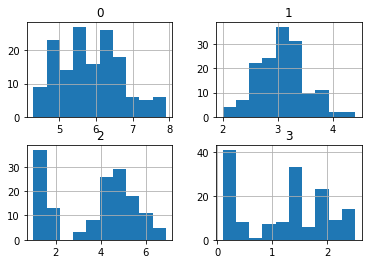

In [ ]:
dataX=pd.DataFrame(X)
dataX.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e678c91f0>,
      dtype=object)

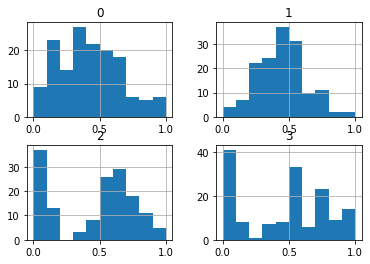

In [ ]:
dataMinMax=pd.DataFrame(X_scaled)
dataMinMax.hist()

## Standard Scaler

Standard Scaler koristimo kada želimo da svaka značajka ima vrijednost meana 0, a standardnu devijaciju i varijancu 1. Korisna je kada imamo podatke koji sadrže i negativne vrijednosti. Raspodijeli podatke u standardnu normalnu distribuciju.
Računa svaki stupac zasebno tako da od svake vrijednosti oduzima mean stupca i dijeli vrijednost standardnom devijacijom.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e677348e0>,
      dtype=object)

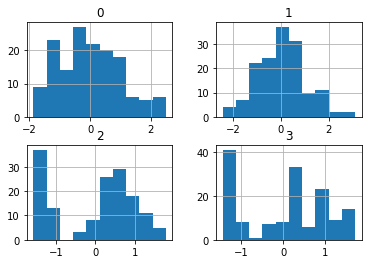

In [ ]:

from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaledStandard = scaler.fit_transform(dataX)
dataStandard=pd.DataFrame(scaledStandard)
dataStandard.hist()

### Max Abs Scaler

MaxAbs Scaler funkcionira slično kao i MinMax, ali skalira podatke u skup vrijednosti -1 do 1. 
Namijenjen je za podatke koji su centrirani oko jedinice ili raspršeni. Ne uništava raspršenost.

Djeluje na način da vrijednosti iz svakog stupca podijelimo s maksimalnom vrijednošću toga stupca.

In [ ]:
X_org = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X_org)
X_maxabs 

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [ ]:
from sklearn import preprocessing
X_org = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e67628250>,
      dtype=object)

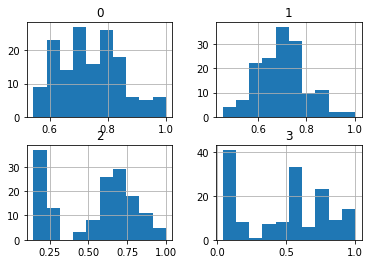

In [ ]:
dataMaxAbs=pd.DataFrame(X_maxabs 
)
dataMaxAbs.hist()

### Robust Scaler

Robust Scaler koristimo kad želimo ukloniti utjecaj outliera iz naših podataka. Ova metoda od podatka oduzima medijan i dijeli podatke interkvartilnim rasponom (između prvog i trećeg kvartila).

Upravo ta širina raspona omogućava manji utjecaj outliera.



In [ ]:
dataR = np.random.normal(0, 15, 30)
data_df = pd.DataFrame({"data":dataR})

In [ ]:
outliers = np.random.uniform(240, 250, 5)
data_df = pd.DataFrame({
    "data": np.append(dataR, outliers)
})

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaler.fit(data_df)

# scale all data points using median and IQR
robust_scaled_data = robust_scaler.transform(data_df)

In [ ]:
standard_scaler = StandardScaler()
# combine both fit & transform into one call
standard_scaled_data = standard_scaler.fit_transform(data_df)


In [ ]:
scaled_values = pd.DataFrame({
    'Standard': standard_scaled_data.reshape(-1),
    'Robust': robust_scaled_data.reshape(-1)
})

scaled_values.describe()

,Standard,Robust
count,3.500000e+01,35.000000
mean,-1.268826e-17,1.540406
std,1.014599e+00,3.794790
min,-6.512506e-01,-0.895393
25%,-4.817430e-01,-0.261403
50%,-4.118527e-01,0.000000
75%,-2.143766e-01,0.738597
max,2.438808e+00,10.661999


##Quantile Transformer Scaler 

Preoblikuje podatke koristeći podatke o kvantilima na način da prate normalnu distribuciju. Također smanjuje utjecaj outliera.

Transformacija se zasebno primjenjuje na svaku značajku. Remeti linearnu vezu, ali omogućava lakšu direktnu usporedbu značajki mjerenih u različitim skalama.


Koristi se tako da neke podatke mapira na željenu distribuciju tako da najveći podatak našeg skupa mapira na najveći referentne distribucije i tako dalje.


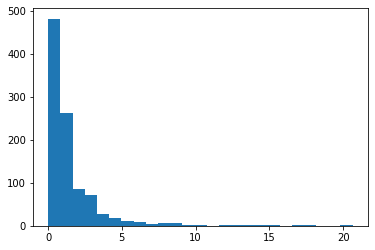

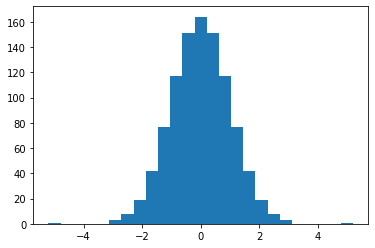

In [ ]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()


### Power Transformer Scaler


Power Transformer Scaler se koristi kako bi se distribucija naših podataka što više približila Gausovoj(normalnoj) razdiobi. Koristi se kada modeliramo pitanja kod kojih varijanca nije konstantna.

Trenutno podržava dvije metode transformacije. Box-Cox metodu i Yeo-Johnson metodu.

Box-Cox se koristi ako su podatci striktno pozitivni, dok Yeo-Johnson podržava i pozitivne i negativne vrijednosti podataka.

Box-Cox metoda koristi koeficijent lambda koji poprima vrijednosti iz skupa (-5,5). Taj koeficijent određuje eksponent potenciranja i metoda traži vrijednost kojom će podtake preoblikovati najbliže normalnoj distribuciji


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.2570812983008078


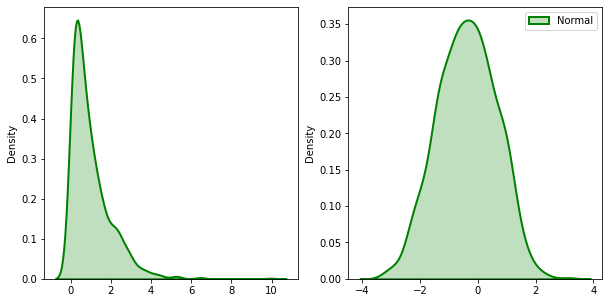

In [ ]:

# import modules
import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
 
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Yeo-Johnson transformatori proširuju Box-Cox transformatore tako da računaju  Box-Cox od y+1 za pozitivne vrijednosti, a za negativne Box-Cox od |y|+1 s parametrom 2.

## Unit Vector Scaler

Normalizira vrijednosti značajke na jedinične vektore.

In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])